The Boston Housing Dataset

The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

CRIM - per capita crime rate by town

ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS - proportion of non-retail business acres per town.

CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

NOX - nitric oxides concentration (parts per 10 million)

RM - average number of rooms per dwelling

AGE - proportion of owner-occupied units built prior to 1940

DIS - weighted distances to five Boston employment centres

RAD - index of accessibility to radial highways

TAX - full-value property-tax rate per $10,000

PTRATIO - pupil-teacher ratio by town

B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

LSTAT - % lower status of the population

MEDV - Median value of owner-occupied homes in $1000's


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/boston-house-prices/housing.csv


The target is MEDV (Median value of owner-occupied homes)

In [2]:
#I will use deep learning method and for scaling will use minmaxscaler
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
#firt of all i will make the dataset ready to model.
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
housing = pd.read_csv("/kaggle/input/boston-house-prices/housing.csv", header=None, delimiter=r"\s+", names=column_names)
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [3]:
#dimension of the dataset
print(np.shape(housing))

(506, 14)


In [4]:
# summarized statistics of data
print(housing.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

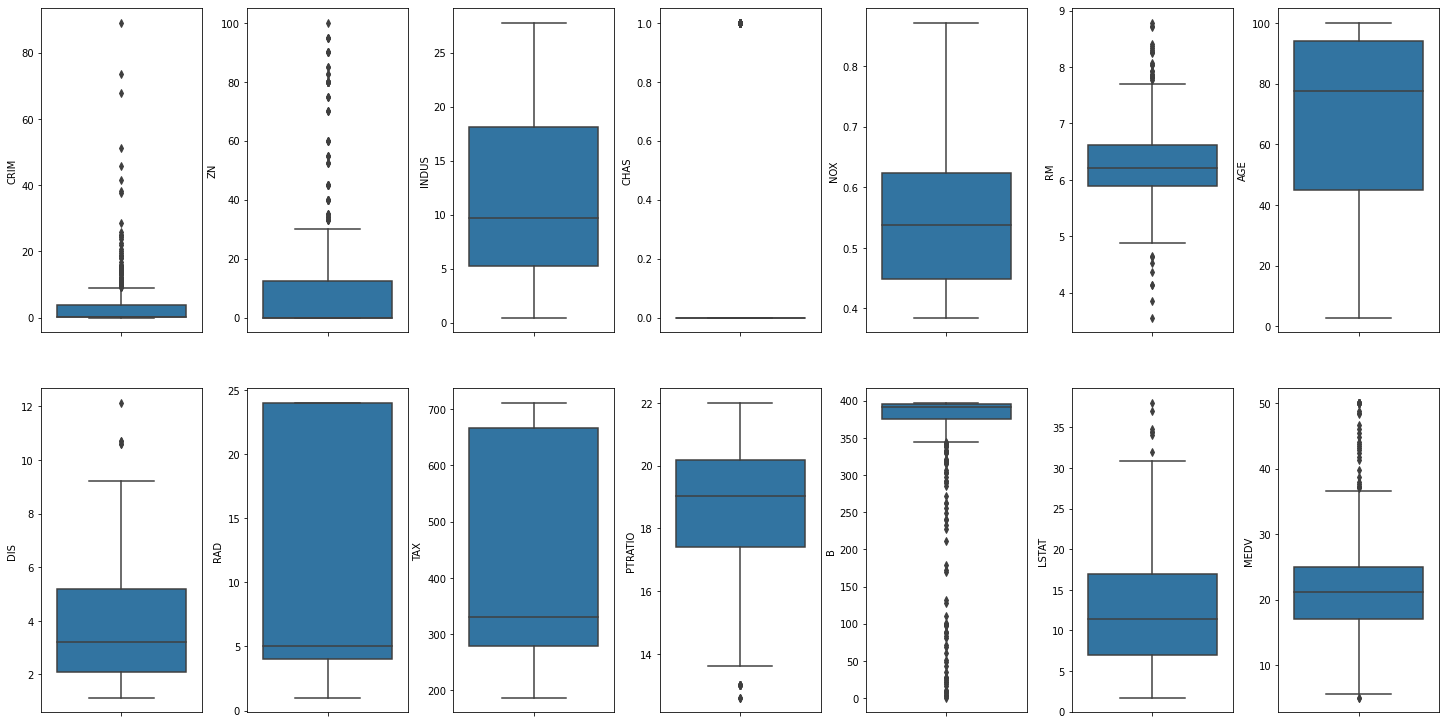

In [5]:
#while prediction of MEDV , the columns ZN and CHAS is not necessary 
#and in the features above 50.00 in MEDV columns are not necessary 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in housing.items():
    sns.boxplot(y=v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [6]:
    for k, v in housing.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(housing)[0]
        print("Column %s outliers = %.2f%%" % (k, perc))
    
#there are outliers in the columns CRIM,ZN,RM and B seemed in the graphs above. 
#lets see the percentages of them

Column CRIM outliers = 13.04%
Column ZN outliers = 13.44%
Column INDUS outliers = 0.00%
Column CHAS outliers = 100.00%
Column NOX outliers = 0.00%
Column RM outliers = 5.93%
Column AGE outliers = 0.00%
Column DIS outliers = 0.99%
Column RAD outliers = 0.00%
Column TAX outliers = 0.00%
Column PTRATIO outliers = 2.96%
Column B outliers = 15.22%
Column LSTAT outliers = 1.38%
Column MEDV outliers = 7.91%


In [7]:
#lets remove features of MEDV columns below 50
housing = housing[~(housing['MEDV'] >= 50.0)]
print(np.shape(housing))

(490, 14)


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

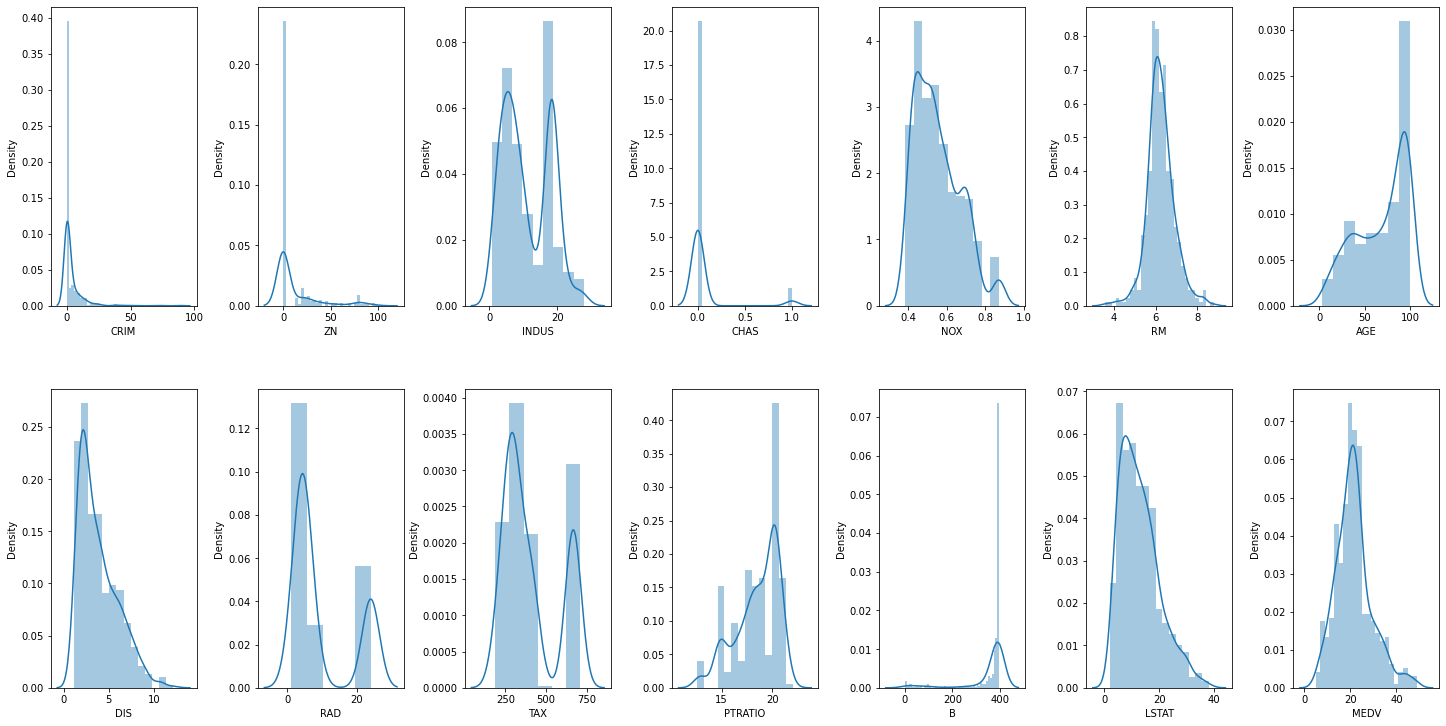

In [8]:
#lets see the new graphs as plot
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in housing.items():
    sns.distplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

<AxesSubplot:>

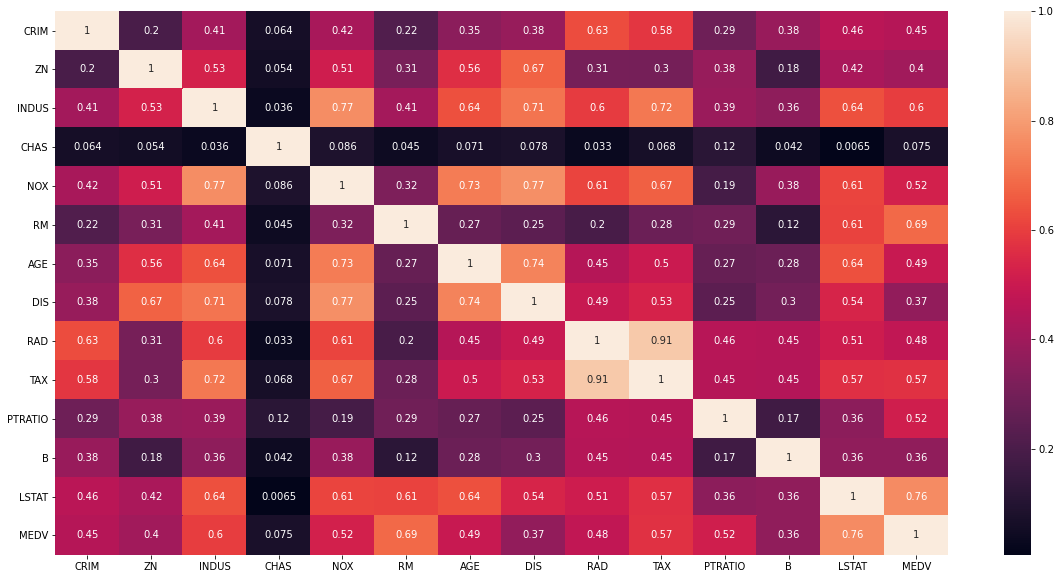

In [9]:
#lets see the correlation
plt.figure(figsize=(20, 10))
sns.heatmap(housing.corr().abs(),  annot=True)

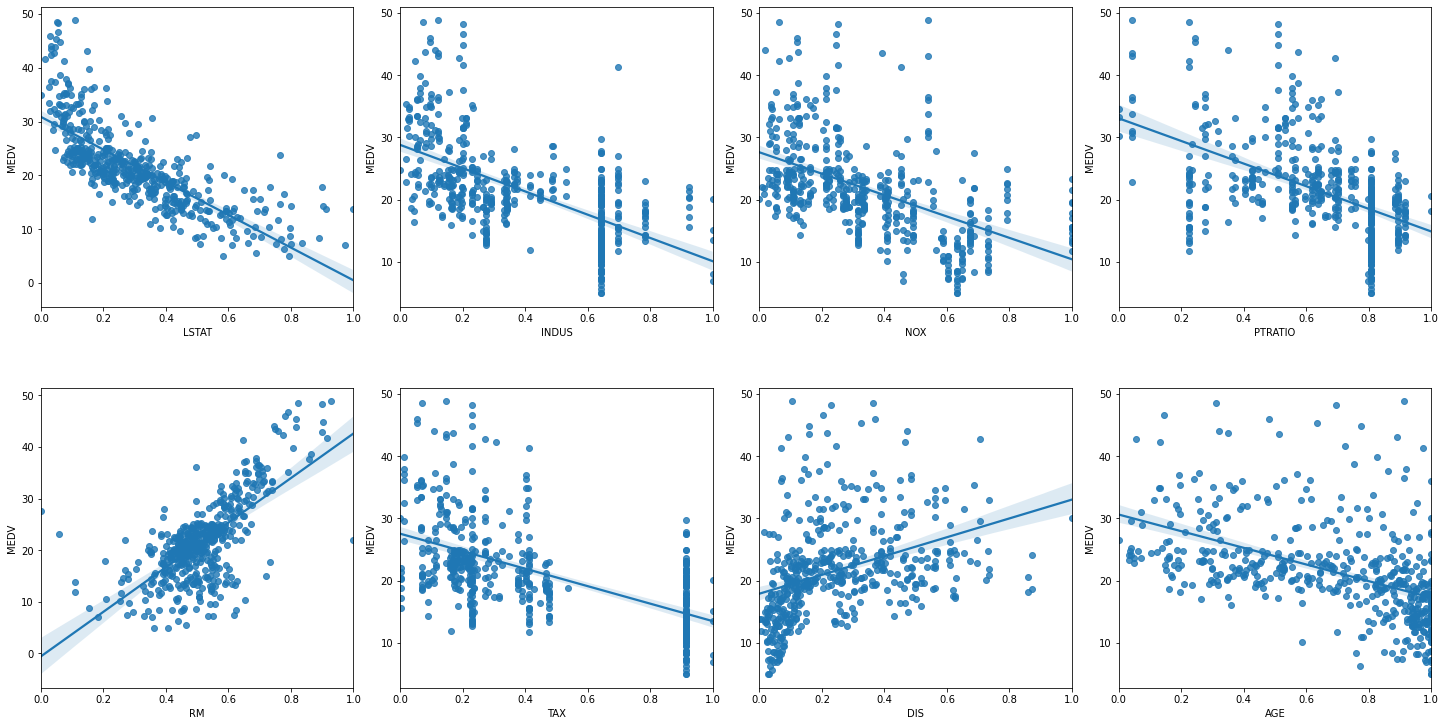

In [10]:
#in the matris above it is seemed that TAX and RAD coloumns are highly correlated but LSTAT,INDUS,RM,TAX,NOX,PTRAIO columns have low correlation.
from sklearn import preprocessing
# Let's scale the columns before plotting them against MEDV
min_max_scaler = preprocessing.MinMaxScaler()
column_sels = ['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE']
x = housing.loc[:,column_sels]
y = housing['MEDV']
x = pd.DataFrame(data=min_max_scaler.fit_transform(x), columns=column_sels)
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i, k in enumerate(column_sels):
    sns.regplot(y=y, x=x[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [11]:
#lets remove the skewness of the data
y =  np.log1p(y)
for col in x.columns:
    if np.abs(x[col].skew()) > 0.3:
        x[col] = np.log1p(x[col])

In [12]:
#starting the model. split the train and test datas. after that i will make fit transfer at the same time
from sklearn.model_selection import train_test_split

train_test_split(housing, y)
x_train, x_test, y_train, y_test = train_test_split(housing, y, train_size = 0.8, random_state = 20)
scaler = MinMaxScaler((-1,1))
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [13]:
#the dataset is ready to model. Deep learning with Keras
#A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.
# Now we add the layers by saying add. If all neural layers are connected, we choose "dense". Get 36 neurals. We choose "relu" as the activation function. And since this is the first hidden layer and it will connect with the inputs, we declare how many variables (as many as xtrain columns) will contact.

mdl = tf.keras.Sequential() 
mdl.add(tf.keras.layers.Dense(36,activation="relu",input_shape = (x_train.shape[1],))) 
#that was the input layer so far
# There will be one output. The activation function in the outputs is linear by default so we did not specify it.
mdl.add(tf.keras.layers.Dense(1)) 
mdl.summary()

# With "compile" we specify the parameters required to solve the model. With "loss", we specify what we will minimize. With "metrics", we write what we want to display.
#After completing the #compile, I now solve it like this;
mdl.compile(optimizer="adam", loss="mean_squared_error", metrics=["mean_absolute_percentage_error"]) 
mdl.fit(x_train,y_train, epochs = 100)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 36)                540       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 37        
Total params: 577
Trainable params: 577
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
13/13 [==============================] - 0s 1ms/step - loss: 5.6917 - mean_absolute_percentage_error: 74.7273
Epoch 2/100
13/13 [==============================] - 0s 1ms/step - loss: 4.0331 - mean_absolute_percentage_error: 62.3205
Epoch 3/100
13/13 [==============================] - 0s 1ms/step - loss: 2.5719 - mean_absolute_percentage_error: 48.8516
Epoch 4/100
13/13 [==============================] - 0s 1ms/step - loss: 1.4630 - mean_absolute_percentage_error: 36.1020
Epoch 5/100
13/13 [=============

In [14]:
from sklearn.metrics import r2_score
ypred_train = mdl.predict(x_train)
ypred_test = mdl.predict(x_test)
print(r2_score(y_train,ypred_train))
print(r2_score(y_test,ypred_test))
# the top train, the bottom test result will come out below.
# Let me state it by the way; if it gives very good results in train data but bad results in test data, it means overfitt.

0.9044642112383536
0.8304692878884998


In [15]:
#Now let's increase the number of layers to 3 to increase the r2 score.

mdl = tf.keras.Sequential()
mdl.add(tf.keras.layers.Dense(128,activation="relu",input_shape = (x_train.shape[1],)))
mdl.add(tf.keras.layers.Dense(64, activation="relu"))
mdl.add(tf.keras.layers.Dense(32, activation="relu"))
mdl.add(tf.keras.layers.Dense(1))

mdl.compile(optimizer="adam", loss="mse", metrics=["mape"])
history = mdl.fit(x_train,y_train, epochs = 1000, verbose=0, validation_split=0.1) #iteration number 1000
ypred_train = mdl.predict(x_train)
ypred_test = mdl.predict(x_test)
print(r2_score(y_train,ypred_train))
print(r2_score(y_test,ypred_test))


0.9907457923387332
0.992725370543521


(-0.35262566596120454, 7.405479467951045)

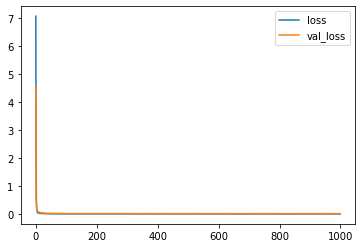

In [16]:
#I think this is a good r2 score.
# now let's see the graph of history.
#As we iterate, we obtain the min value and update the values according to the results. In deep learnin, we do not separate the data into train and test, we divide it into 3 as train, test and validation.
#In the #alidation data set, I want to see if my model is overfitting and find the optimum point;
#We have seen what are mse and mape values in validation value in each iteration. Let's draw them above.
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame(history.history) 
df.head()
df[["loss","val_loss"]].plot()  
plt.ylim()

We can see that the model converged reasonably quickly and both train and test performance remained equivalent. The performance and convergence behavior of the model suggest that mean squared error is a good match for a neural network learning this problem.

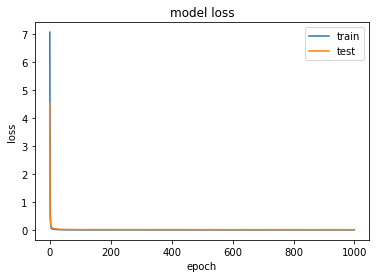

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()